# Number Recognizer

今回は、ブラウザ上に書いた手書きの数字を認識させます。具体的には、canvasに書かれた数字が0～9のどれであるかを当てさせます。  
その予測を行うためのモデルを、以下のステップに沿って作成していきます。


* [データロード](#Load-the-Data)
* [モデル構築](#Create-the-Model)
* [学習](#Training-the-Model)
* [評価](#Evaluate-the-Model)
* [保存](#Store-the-Model)


In [2]:
# グラフが文章中に表示されるようにするおまじない
%matplotlib inline

## Load the Data

scikit-learnには、最初から手書きの数字を認識するための学習データ(手書き数字の画像データと、その画像の数字が0～9の何れであるかという答えのセット)が搭載されているため、それを利用します。

In [3]:
def load_data():
    from sklearn import datasets
    dataset = datasets.load_digits()
    return dataset

digits = load_data()
print(digits.data.shape)

(1797, 64)


`1797`は行数、`64`は次元数です。手書き文字の画像データが8×8のサイズであるため、その中のピクセル情報は64となります(今回値はグレースケールですが、RGBの場合3倍になります)。

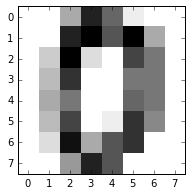

In [4]:
def show_image(image):
    import matplotlib.pyplot as plt

    plt.figure(1, figsize=(3, 3))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

show_image(digits.images[0])

## Create the Model

今回扱うのは画像の分類問題になります。そこで、シンプルな線形分類機であるSGDClassifierを利用します。

In [5]:
def make_model():
    from sklearn.linear_model import SGDClassifier    
    clf = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
    return clf
    
classifier = make_model()

## Training the Model

データとモデルがそろったため、学習させてみます。

In [6]:
classifier.fit(digits.data, digits.target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

## Evaluate the Model

学習させたモデルの精度を計測してみます。`predict`で予測させることができるので、これで予測させた値と実際の答え(`digits.target`)を比べてみます。

In [7]:
def calculate_accuracy(model, dataset):
    from sklearn import metrics

    predicted = model.predict(dataset.data)
    score = metrics.accuracy_score(dataset.target, predicted)
    return score

print(calculate_accuracy(classifier, digits))

0.9877573734


## Store the Model

最後に、学習させたモデルを保存します。アプリケーション側で、その結果を確認してみてください。

In [8]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine.pkl") 

['./machine.pkl',
 './machine.pkl_01.npy',
 './machine.pkl_02.npy',
 './machine.pkl_03.npy',
 './machine.pkl_04.npy']

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        88
          1       0.00      0.00      0.00        91
          2       0.00      0.00      0.00        86
          3       0.10      1.00      0.18        91
          4       0.00      0.00      0.00        92
          5       0.00      0.00      0.00        91
          6       0.00      0.00      0.00        91
          7       0.00      0.00      0.00        89
          8       0.00      0.00      0.00        88
          9       0.00      0.00      0.00        92

avg / total       0.01      0.10      0.02       899


Confusion matrix:
[[ 0  0  0 88  0  0  0  0  0  0]
 [ 0  0  0 91  0  0  0  0  0  0]
 [ 0  0  0 86  0 

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


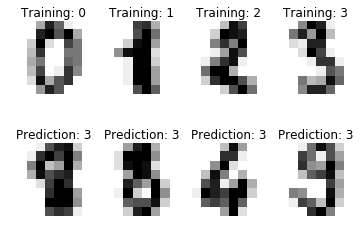

In [10]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of
# digits, let's # have a look at the first 3 images, stored in
# the `images` attribute of the # dataset.  If we were working
# from image files, we could load them using # pylab.imread.
# Note that each image must have the same size. For these  images,
#we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.1)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
predicted = classifier.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
    % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s"
    % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(
                        zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()
